code from https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [83]:
def draw_scatter_plot(df, series_name):
    np_array = df[series_name].values
    
    plt.figure(figsize=(8,6))
    plt.scatter(range(len(np_array)), np.sort(np_array))
    plt.xlabel('index', fontsize=12)
    plt.ylabel(series_name, fontsize=12)
    plt.show()
    
    
def draw_dist_plot(df, series_name):
    np_array = df[series_name].values
    
    plt.figure(figsize=(12,8))
    sns.distplot(np_array, bins=50, kde=False)
    plt.xlabel(series_name, fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.show()
    

def draw_plots(df, series_name):
    draw_scatter_plot(df, series_name)
    draw_dist_plot(df, series_name)

    
def draw_np_array_scatter_plot(np_array, series_name):
    plt.figure(figsize=(8,6))
    plt.scatter(range(len(np_array)), np.sort(np_array))
    plt.xlabel('index', fontsize=12)
    plt.ylabel(series_name, fontsize=12)
    plt.show()
    
    
def draw_np_array_dist_plot(np_array, series_name):
    plt.figure(figsize=(12,8))
    sns.distplot(np_array, bins=50, kde=False)
    plt.xlabel(series_name, fontsize=12)
    plt.ylabel('count', fontsize=12)
    plt.show()
    

def convert_outlier_value(df, series_name, upper_percentile=99.0, lower_percentile=1.0):
    np_array = df[series_name].values
    
    ulimit = np.percentile(np_array, upper_percentile)
    llimit = np.percentile(np_array, lower_percentile)
    print('upper limit :', ulimit, ', lower limit :', llimit)
    
    # convert
    df[series_name].loc[df[series_name] > ulimit] = ulimit
    df[series_name].loc[df[series_name] < llimit] = llimit


In [2]:
from subprocess import check_output
print(check_output(['ls', 'input']).decode('utf8'))

properties_2016.csv
sample_submission.csv
train_2016_v2.csv
zillow_data_dictionary.xlsx



In [44]:
train_df = pd.read_csv('input/train_2016_v2.csv', parse_dates=['transactiondate'])
print('train_df.shape :', train_df.shape)
display(train_df.head())

train_df.shape : (90275, 3)


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


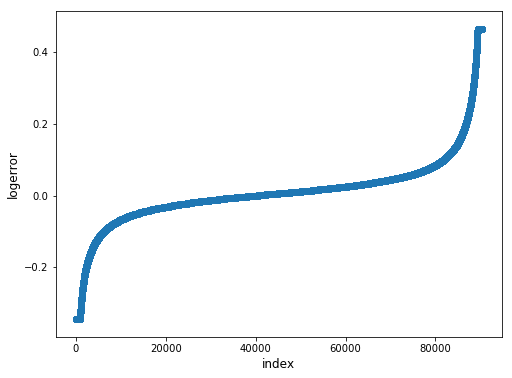

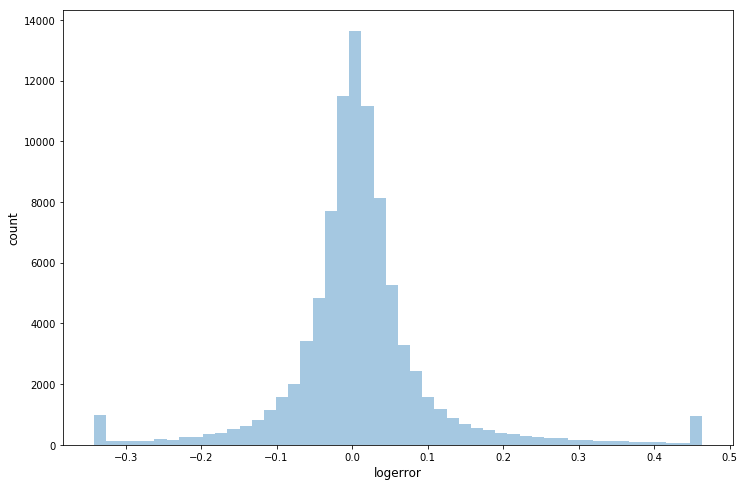

In [50]:
draw_plots(train_df, 'logerror')

In [47]:
convert_outlier_value(train_df, 'logerror')

upper limit : 0.463882 , lower limit : -0.3425


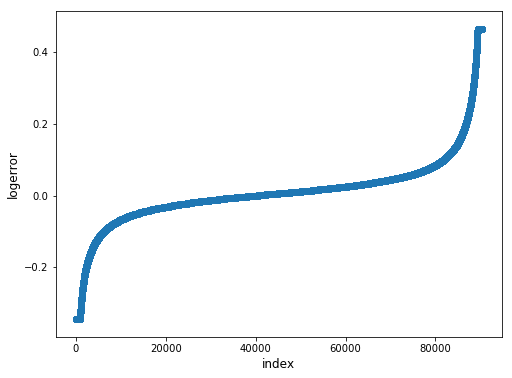

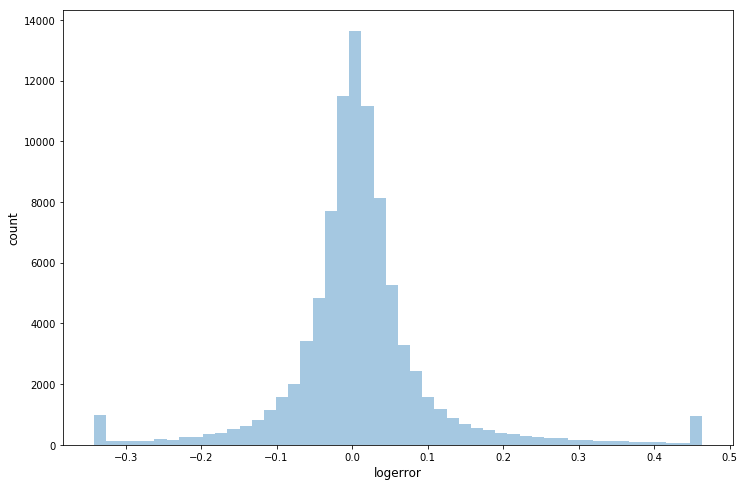

In [51]:
draw_plots(train_df, 'logerror')

In [52]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month
display(train_df.head())

,parcelid,logerror,transactiondate,transaction_month
0,11016594,0.0276,2016-01-01,1
1,14366692,-0.1684,2016-01-01,1
2,12098116,-0.0040,2016-01-01,1
3,12643413,0.0218,2016-01-02,1
4,14432541,-0.0050,2016-01-02,1


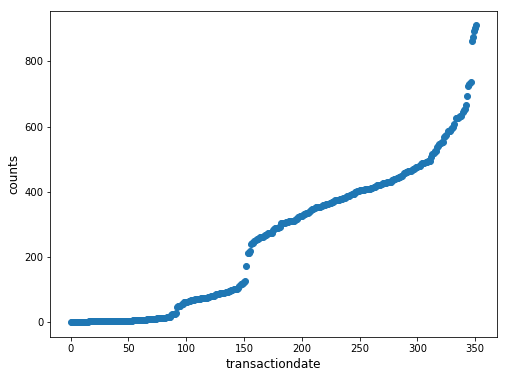

In [54]:
transactiondate_cnt_srs = train_df['transactiondate'].value_counts()

plt.figure(figsize=(8,6))
plt.scatter(range(len(transactiondate_cnt_srs)), np.sort(transactiondate_cnt_srs))
plt.xlabel('transactiondate', fontsize=12)
plt.ylabel('counts', fontsize=12)
plt.show()

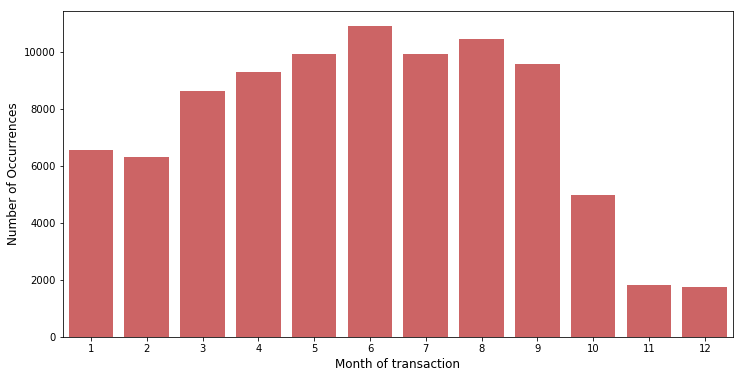

In [58]:
cnt_srs = train_df['transaction_month'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [59]:
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [60]:
prop_df = pd.read_csv('input/properties_2016.csv', low_memory=False)
print('properties 2016 shape :', prop_df.shape)
display(prop_df.head())

properties 2016 shape : (2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [61]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by='missing_count')
display(missing_df)

,column_name,missing_count
35,rawcensustractandblock,11437
25,longitude,11437
24,latitude,11437
37,regionidcounty,11437
17,fips,11437
33,propertylandusetypeid,11437
52,assessmentyear,11439
5,bedroomcnt,11450
4,bathroomcnt,11462
40,roomcnt,11475


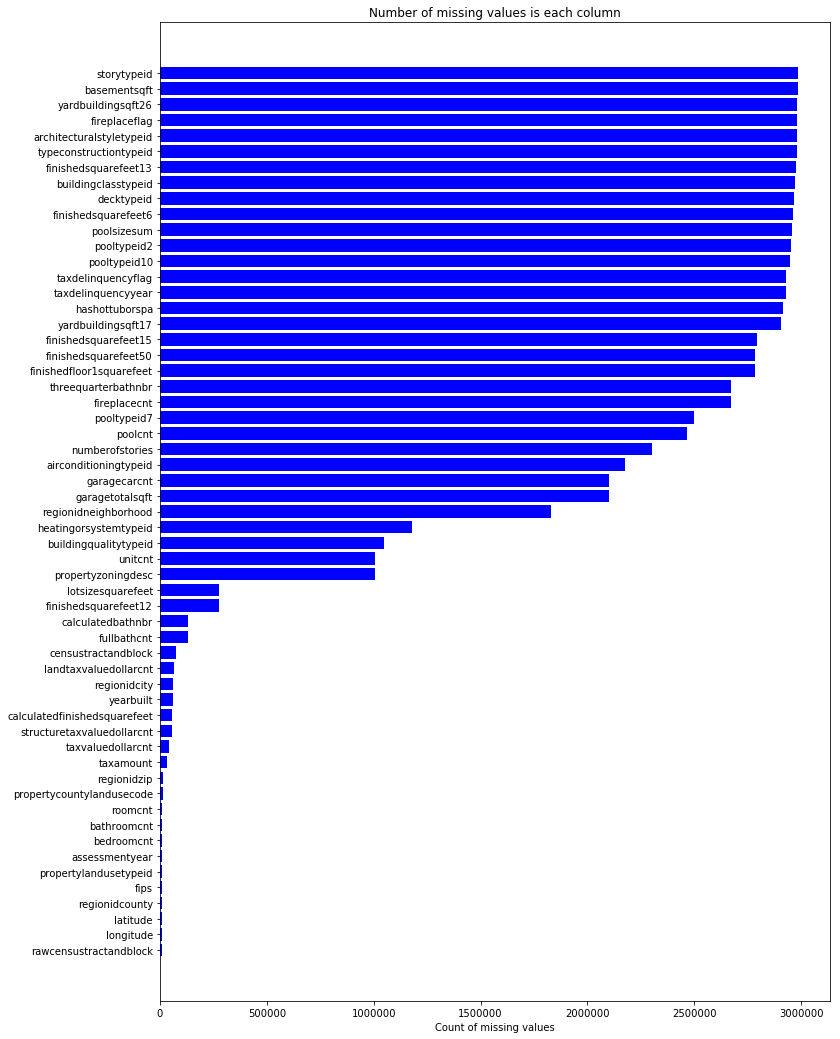

In [62]:
ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticklabels(missing_df.column_name.values)
plt.yticks(ind)
plt.xlabel('Count of missing values')
plt.title('Number of missing values is each column')
plt.show()

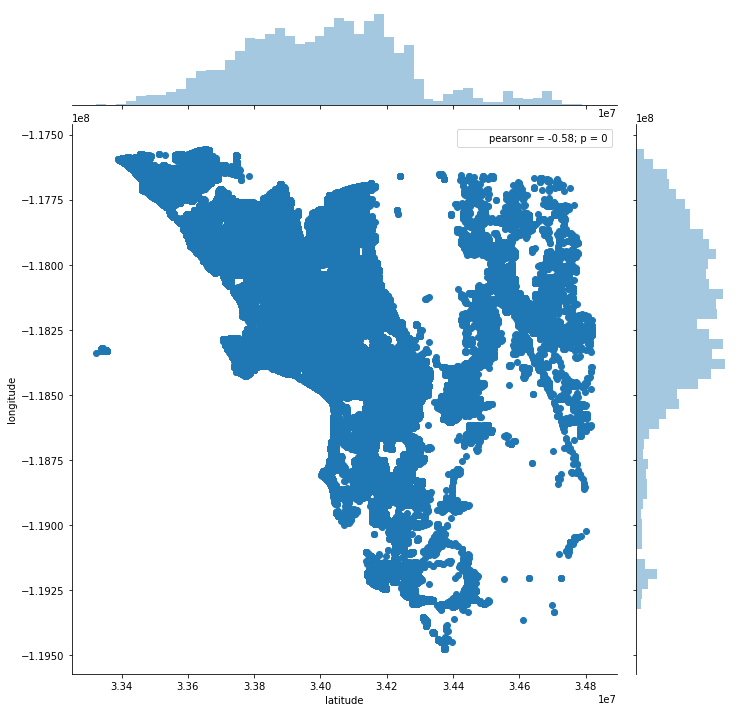

In [16]:
plt.figure(figsize=(12,12))
sns.jointplot('latitude', 'longitude', data=prop_df, size=10)
plt.show()

In [63]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [64]:
pd.options.display.max_rows = 65
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ['Count', 'Column Type']
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


In [65]:
dtype_df.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


In [66]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df.loc[missing_df['missing_ratio'] > 0.99]

,column_name,missing_count,missing_ratio
5,architecturalstyletypeid,90014,0.997109
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
12,decktypeid,89617,0.992711
16,finishedsquarefeet13,90242,0.999634
19,finishedsquarefeet6,89854,0.995336
44,storytypeid,90232,0.999524
46,typeconstructiontypeid,89976,0.996688
49,yardbuildingsqft26,90180,0.998948
52,fireplaceflag,90053,0.997541


In [67]:
mean_values = train_df.mean(axis=0)
train_df_new = train_df.fillna(mean_values)

In [68]:
missing_df = train_df_new.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df_new.shape[0]
missing_df.loc[missing_df['missing_ratio'] > 0]['column_name']

35    propertycountylandusecode
37           propertyzoningdesc
58           taxdelinquencyflag
Name: column_name, dtype: object

In [69]:
print(train_df_new['taxdelinquencyflag'].value_counts())
train_df_new['taxdelinquencyflag'] = train_df_new['taxdelinquencyflag'] \
                .apply(lambda x: True if x == True or x == 'Y' else False)
print(train_df_new['taxdelinquencyflag'].value_counts())

Y    1783
Name: taxdelinquencyflag, dtype: int64
False    88492
True      1783
Name: taxdelinquencyflag, dtype: int64


In [70]:
train_df_new = train_df_new.fillna('UNKNOWN')

In [71]:
missing_df = train_df_new.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df_new.shape[0]
missing_df.loc[missing_df['missing_ratio'] > 0]['column_name']

Series([], Name: column_name, dtype: object)

In [72]:
x_cols = [col 
          for col in train_df_new.columns 
          if col not in ['logerror'] 
          if train_df_new[col].dtype=='float64']
labels = []
values = []
for col in x_cols:
    if np.std(train_df_new[col]) == 0.0:
        print('std is 0', col)
    else:
        labels.append(col)
        values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

std is 0 buildingclasstypeid
std is 0 decktypeid
std is 0 poolcnt
std is 0 pooltypeid10
std is 0 pooltypeid2
std is 0 pooltypeid7
std is 0 storytypeid
std is 0 assessmentyear


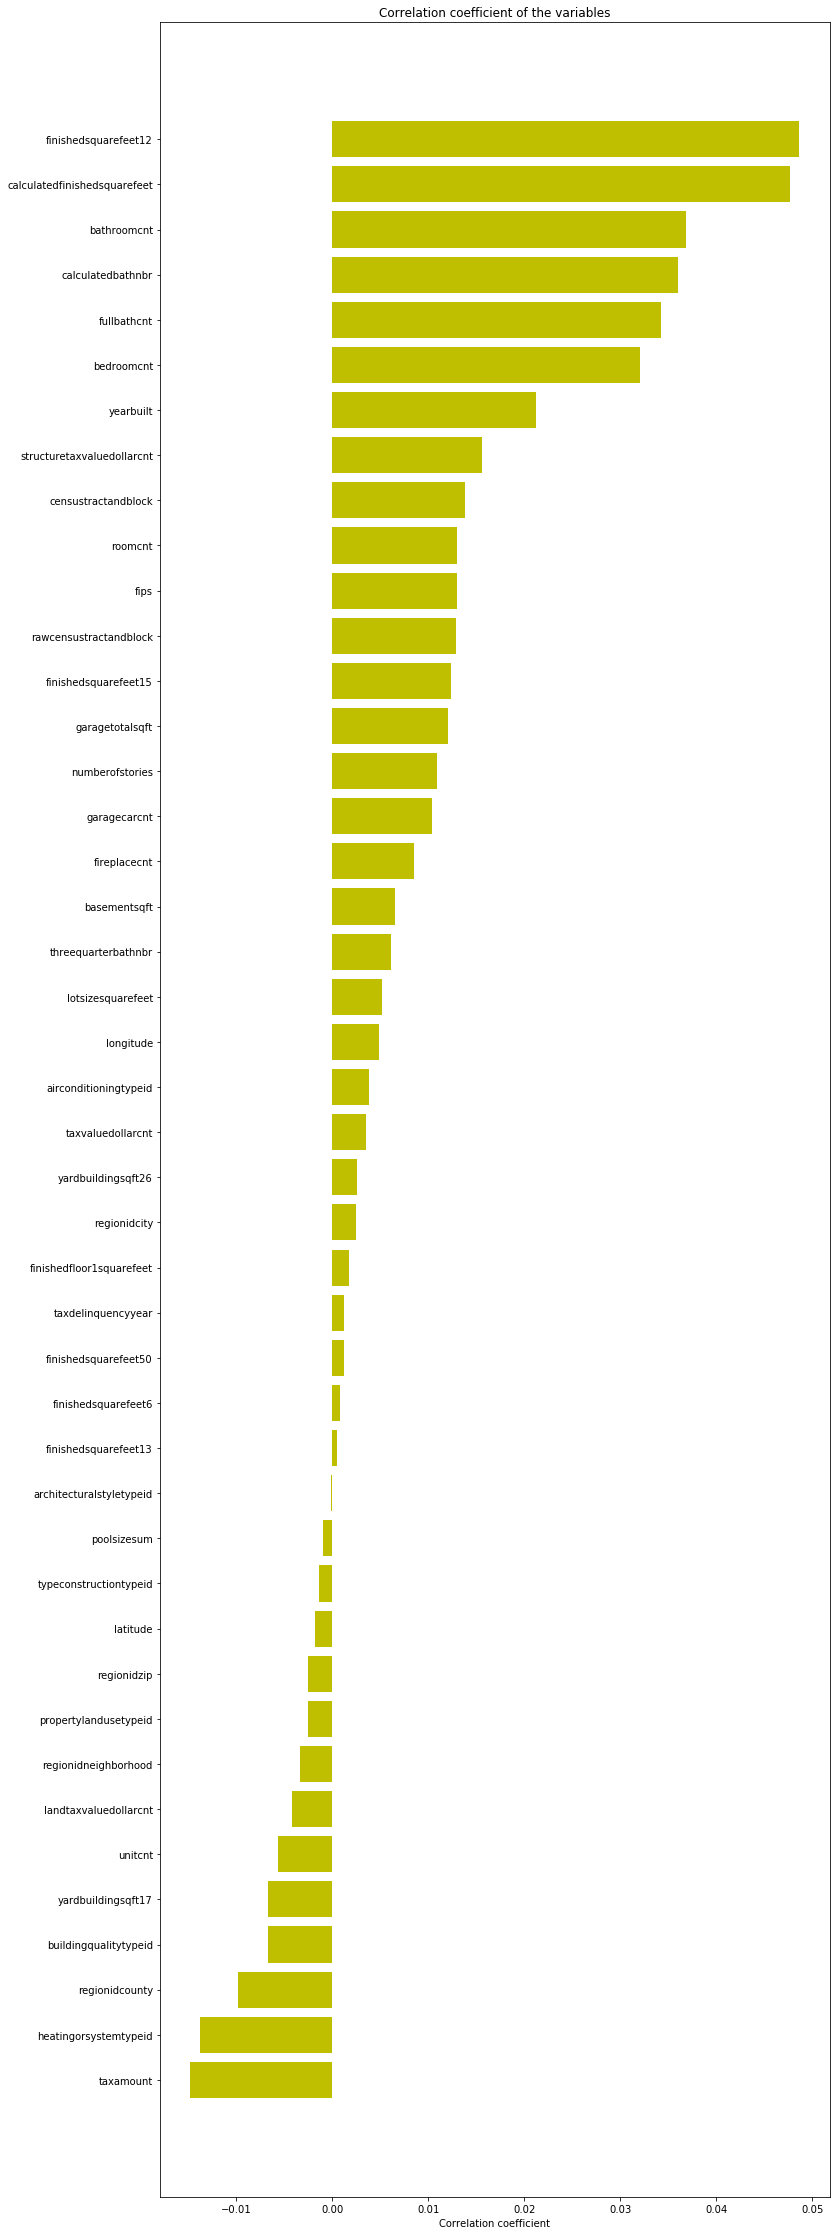

In [73]:
ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12, 40))
rects = ax.barh(ind, np.array(corr_df['corr_values'].values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df['col_labels'].values, rotation='horizontal')
plt.xlabel('Correlation coefficient')
plt.title('Correlation coefficient of the variables')
plt.show()

In [74]:
corr_df_sel = corr_df.loc[(corr_df['corr_values'] > 0.02) 
                          | (corr_df['corr_values'] < -0.01)]
display(corr_df_sel)

,col_labels,corr_values
41,taxamount,-0.014768
19,heatingorsystemtypeid,-0.013732
36,yearbuilt,0.021171
4,bedroomcnt,0.032035
16,fullbathcnt,0.034267
6,calculatedbathnbr,0.036019
3,bathroomcnt,0.036862
8,calculatedfinishedsquarefeet,0.047659
9,finishedsquarefeet12,0.048611


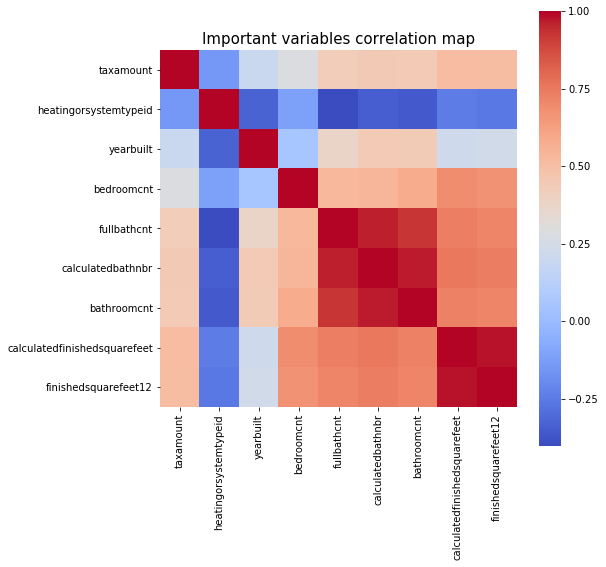

In [75]:
cols_to_use = corr_df_sel['col_labels'].tolist()

temp_df = train_df_new[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, vmax=1., square=True, cmap='coolwarm')
plt.title('Important variables correlation map', fontsize=15)
plt.show()

# finishedsquarefeet12

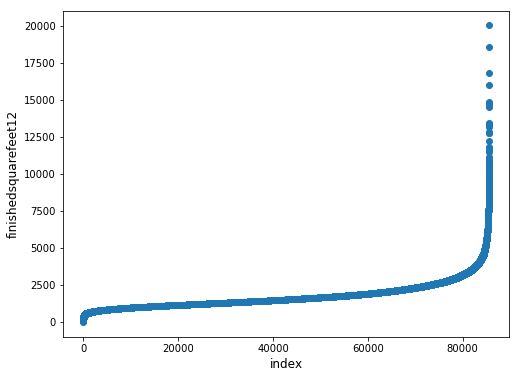

In [77]:
col_name = 'finishedsquarefeet12'
draw_scatter_plot(train_df, 'finishedsquarefeet12')

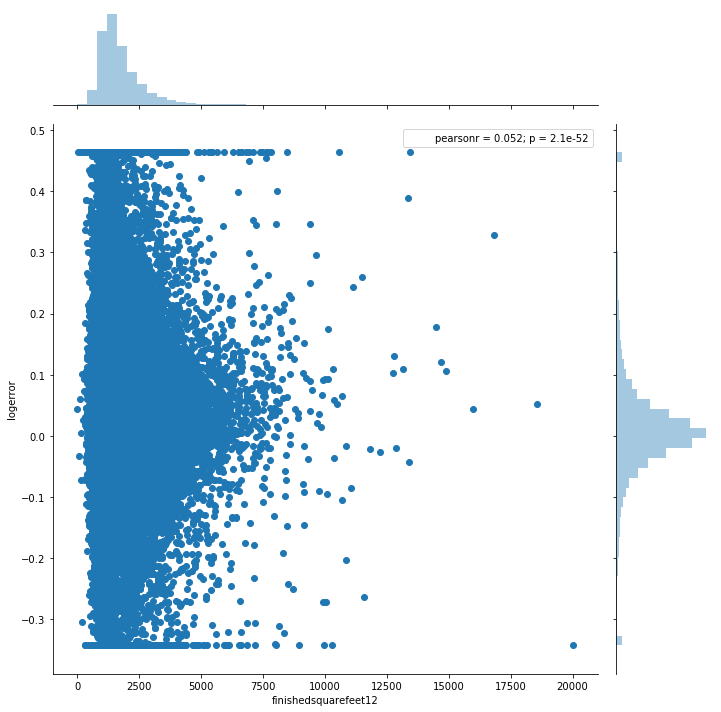

In [97]:
sns.jointplot('finishedsquarefeet12', 'logerror', data=train_df, size=10)

In [91]:
col = "finishedsquarefeet12"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
print('upper limit :', ulimit, ', lower limit :', llimit)

np_array = train_df['finishedsquarefeet12'].values

ulimit = np.percentile(np_array, 99.5)
llimit = np.percentile(np_array, 0.5)
print('upper limit :', ulimit, ', lower limit :', llimit)

# convert
train_df['finishedsquarefeet12'].loc[train_df['finishedsquarefeet12'] > ulimit] = ulimit
train_df['finishedsquarefeet12'].loc[train_df['finishedsquarefeet12'] < llimit] = llimit

#convert_outlier_value(train_df, 'finishedsquarefeet12', upper_percentile=99.5, lower_percentile=0.5)

upper limit : nan , lower limit : nan
upper limit : nan , lower limit : nan


/home/voyageth/develop/anaconda3/envs/kaggle/lib/python3.6/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [31]:
print('hi')

hi
